# Calls to the National Poisons Information Service (NPIS) in the UK on poisonings from alcohol-based hand sanitisers in 2019 vs 2020

#### This notebook visualises the data provided by Public Health England through a Freedom of Information (FOI) request available <a href="https://www.whatdotheyknow.com/request/poisoning_from_alcohol_based_han" target="_blank">here</a>. 

In [1]:
# import libraries required for analysis 
import numpy as np
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data 
df1 = pd.read_csv("calls_NPIS.csv",thousands=',')
df1.head() 

,month,date_2019,calls_2019,date_2020,calls_2020
0,Jan,1/1/19,4.0,1/1/20,3.0
1,Jan,7/1/19,7.0,6/1/20,2.0
2,Jan,14/1/19,4.0,13/1/20,3.0
3,Jan,21/1/19,2.0,20/1/20,6.0
4,Jan,28/1/19,2.0,27/1/20,6.0


In [3]:
df2 = df1.groupby('month').sum()
df2.head()

,calls_2019,calls_2020
month,,
Apr,15.0,36.0
Aug,14.0,74.0
Feb,16.0,21.0
Jan,19.0,20.0
Jul,15.0,56.0


In [4]:
df3 = df2.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
df3.head()

,calls_2019,calls_2020
month,,
Jan,19.0,20.0
Feb,16.0,21.0
Mar,24.0,37.0
Apr,15.0,36.0
May,16.0,49.0


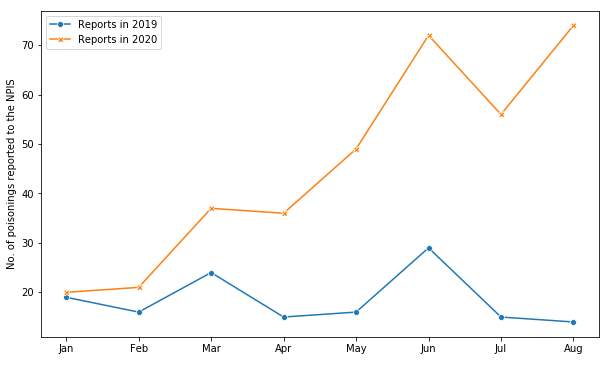

In [7]:
# plot data - monthly 

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df3, sort=False, markers=True, dashes=False)
plt.xlabel(' ')
plt.ylabel('No. of poisonings reported to the NPIS')
plt.legend(['Reports in 2019', 'Reports in 2020'])

plt.savefig("monthly_calls.png", dpi=600)

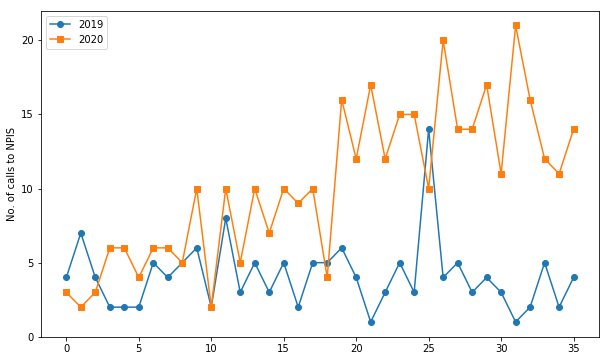

In [8]:
# plot data - weekly 

from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6

plt.plot(df1.calls_2019, "o-", label='2019')
plt.plot(df1.calls_2020, "s-", label='2020')
plt.ylabel("No. of calls to NPIS")
plt.yticks(np.arange(0, 21, 5))
plt.style.use('seaborn-colorblind')
plt.legend(loc=2);

plt.savefig('weekly_calls.png')

In [ ]:
# if fig size needs to be increased/changed for publication, refer back to:
# https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d

In [8]:
# Handle date time conversions between pandas and matplotlib notes 
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()
# import datetime
# import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter